In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

In [2]:
events = pd.read_csv("events.csv", low_memory=False)

euro = events[events['competition_season'] == "UEFA Euro_2020"]
cdm = events[events['competition_season'] == "FIFA World Cup_2022"]
cdm_final = cdm[cdm['match_date'] == "2022-12-18"]

df = events.sort_index()



In [543]:
df = df[df["type.name"].isin(["Pass","Carry", "Clearance", "Dribble", "Shot", "Dispossessed", "Ball Recovery"])]
df = df[df["period"] <= 4]

In [542]:
df["type.name"].value_counts()

type.name
Pass                 657655
Ball Receipt*        614889
Carry                519401
Pressure             211395
Ball Recovery         71396
Duel                  44791
Clearance             29914
Block                 26015
Dribble               22656
Goal Keeper           20610
Miscontrol            19783
Interception          17345
Shot                  17179
Dispossessed          16909
Foul Committed        16520
Foul Won              15655
Dribbled Past         14054
Substitution           5065
Injury Stoppage        3671
Half Start             2810
Half End               2810
Tactical Shift         1700
Referee Ball-Drop      1552
50/50                  1502
Starting XI            1350
Shield                  964
Player Off              645
Player On               642
Error                   417
Bad Behaviour           352
Offside                 206
Own Goal Against         78
Own Goal For             78
Name: count, dtype: int64

## Create the possesion 2

In [3]:
df["possession_2"] = df["possession"].copy()

for i in df["possession_2"].unique():
    sub = df[df["possession_2"] == i]

    if "Shot" in sub["type.name"].unique() and sub["type.name"].value_counts()["Shot"] > 1:
        shot_part = sub[sub["type.name"] == "Shot"].index

        for idx in shot_part[:-1]:
            df.loc[idx+2:, "possession_2"] += 1

## PSV

In [4]:
# Créer une colonne 'PSV' avec des valeurs par défaut de 0
df['PSV'] = .0

# Identifier les indices des tirs dans le dataframe
shoot_indices = df[df['type.name'] == 'Shot'].index

# Calculer le PSV pour chaque séquence de possession
for idx in shoot_indices:
    possession_idx = df.loc[:idx, 'possession_2'].max()
    possession_events = df[df['possession_2'] == possession_idx]

    # Calculer le PSV pour la séquence de possession
    total_xG = possession_events['shot.statsbomb_xg'].astype(float).sum()
    df.loc[df['possession_2'] == possession_idx, 'PSV'] = total_xG

In [546]:
df["PSV"].describe()

count    1.335110e+06
mean     1.814739e-02
std      6.823153e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.861261e-01
Name: PSV, dtype: float64

In [547]:
df[df["possession_2"]== 210][["possession_2", "type.name", "shot.statsbomb_xg", "PSV", "match_id"]]

,possession_2,type.name,shot.statsbomb_xg,PSV,match_id
3050,210,Pass,NaN,0.000000,3827767
6173,210,Pass,NaN,0.000000,3827335
6175,210,Carry,NaN,0.000000,3827335
6176,210,Pass,NaN,0.000000,3827335
6178,210,Carry,NaN,0.000000,3827335
6180,210,Pass,NaN,0.000000,3827335
6181,210,Ball Recovery,NaN,0.000000,3827335
6182,210,Carry,NaN,0.000000,3827335
6183,210,Pass,NaN,0.000000,3827335
6186,210,Pass,NaN,0.000000,3827335


In [510]:
df[["minute","possession", "possession_2", "player.name", "type.name", "PSV", "shot.statsbomb_xg"]].iloc[4050:4070]

,minute,possession,possession_2,player.name,type.name,PSV,shot.statsbomb_xg
36400,107,228,229,Leandro Daniel Paredes,Ball Recovery,0.104072,NaN
36401,107,228,229,Leandro Daniel Paredes,Carry,0.104072,NaN
36402,107,228,229,Leandro Daniel Paredes,Pass,0.104072,NaN
36403,107,228,229,Gonzalo Ariel Montiel,Ball Receipt*,0.104072,NaN
36404,107,228,229,Gonzalo Ariel Montiel,Carry,0.104072,NaN
36405,107,228,229,Gonzalo Ariel Montiel,Pass,0.104072,NaN
36406,107,228,229,Lautaro Javier Martínez,Ball Receipt*,0.104072,NaN
36407,107,228,229,Lautaro Javier Martínez,Pass,0.104072,NaN
36408,107,228,229,Lionel Andrés Messi Cuccittini,Ball Receipt*,0.104072,NaN
36409,107,228,229,Lionel Andrés Messi Cuccittini,Carry,0.104072,NaN


## xT

In [511]:
obv_type= ['Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past','Offside']

In [512]:
df = df[df["type.name"].isin(obv_type)]

In [548]:
df["x"] = df["location"].apply(lambda x: x.split(",")[0][1:]).astype(float)
df["y"] = df["location"].apply(lambda x: x.split(",")[1][:-1]).astype(float)

In [549]:
prob_rows = np.array([
    [0.2, 0.3, 0.3, 0.3, 0.4, 0.4, 0.5, 0.7, 0.8, 1, 1.3, 1.8, 2.5, 3.7, 4.8, 6, 6.6],
    [0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.7, 0.8, 1.1, 1.5, 2, 2.9, 4.2, 5.6, 7.5, 6.6],
    [0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.6, 0.7, 0.9, 1.2, 1.6, 2.2, 3.4, 4.6, 6.8, 9.4, 10.3],
    [0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6, 0.7, 0.9, 1.2, 1.6, 2.3, 3.4, 4.6, 6.8, 9.9, 12.3],
    [0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.6, 0.7, 1, 1.3, 1.7, 2.5, 3.4, 4.8, 6.8, 12.6, 15.8],
    [0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.8, 0.9, 1.3, 1.7, 2.5, 3.3, 5.2, 8.9, 17.1, 41]
])

# Mirror the probabilities to create a full 12x16 grid
xT_values = np.vstack((prob_rows, np.flipud(prob_rows)))

# Normalize the probabilities to a scale of 0-1 (dividing by 100 since they were given as percentages)
xT_values /= 100

# Function to map location to xT value
def map_location_to_xT(x,y, xT_values):
    # Map the x and y coordinates to the xT grid
    xT_x = min(int(np.floor(float(x) / 120 * 16)), 15)
    xT_y = min(int(np.floor(float(y) / 80 * 12)), 11)
    return xT_values[xT_y, xT_x]

# Apply the function to the DataFrame
df['xT'] = df.apply(lambda row: map_location_to_xT(row['x'], row['y'], xT_values), axis=1)

In [550]:
df.loc[(df["pass.outcome.name"].isnull())& (df["type.name"] == "Pass"), "pass.outcome.name"] = "Complete"
df.loc[(df["pass.outcome.id"].isnull()) & (df["type.name"] == "Pass"), "pass.outcome.id"] = 8.

In [551]:
def get_outcome(row):
    if row["type.name"] == "Pass":
        return row["pass.outcome.name"]
    elif row["type.name"] == "Dribble":
        return row["dribble.outcome.name"]
    elif row["type.name"] == "Shot":
        return row["shot.outcome.name"]
    else:
        return None
    
df["outcome"] = df.apply(get_outcome, axis=1)

In [552]:
def get_end_location(row):
    if pd.notnull(row['pass.end_location']):
        return row['pass.end_location']

    elif pd.notnull(row['shot.end_location']):
        return row['shot.end_location']

    elif pd.notnull(row['carry.end_location']):
        return row['carry.end_location']

    elif row["type.name"] == "Dribble":
        # return end_location of next event
        row_index = row.name
        next_index = row_index + 1

        if next_index in df.index:  # Vérifie si le prochain index existe
            next_event = df.loc[next_index]
            return next_event.get("carry.end_location")
    else:
        return row['location']

def remove_brackets(x):
    if x[-1] == "]":
        return x[:-1]
    elif x[0] == "[":
        return x[1:]
    else:  
        return x

df['end_location'] = df.apply(get_end_location, axis=1)
df['end_x'] = df.apply(lambda row: float(remove_brackets(row['end_location'].split(",")[0])) if pd.notnull(row['end_location']) else None, axis=1)
df['end_y'] = df.apply(lambda row: float(remove_brackets(row['end_location'].split(",")[1])) if pd.notnull(row['end_location']) else None, axis=1)

df['end_z'] = df.apply(lambda row: float(remove_brackets(row['end_location'].split(",")[-1])) if pd.notnull(row['end_location']) and row['type.name'] == 'Shot' else 0, axis=1)


df['xT.end'] = df.apply(lambda row: map_location_to_xT(row['end_x'], row['end_y'], xT_values) if pd.notnull(row['end_location']) else None, axis=1)

In [553]:
df.iloc[230:240][["type.name", "player.name", "outcome", "end_location", "carry.end_location", "end_x", "end_y", "end_z", "xT", "xT.end"]]

,type.name,player.name,outcome,end_location,carry.end_location,end_x,end_y,end_z,xT,xT.end
396,Pass,Lalthathanga Khawlhring,Complete,"[78.8, 69.5]",NaN,78.8,69.5,0.0,0.011,0.015
398,Carry,Álvaro Vázquez García,None,"[79.6, 70.3]","[79.6, 70.3]",79.6,70.3,0.0,0.015,0.015
399,Pass,Álvaro Vázquez García,Complete,"[76.0, 65.6]",NaN,76.0,65.6,0.0,0.015,0.016
401,Carry,Lalthathanga Khawlhring,None,"[74.7, 60.7]","[74.7, 60.7]",74.7,60.7,0.0,0.016,0.012
402,Pass,Lalthathanga Khawlhring,Complete,"[63.1, 34.6]",NaN,63.1,34.6,0.0,0.012,0.009
404,Carry,Marko Lešković,None,"[64.9, 29.3]","[64.9, 29.3]",64.9,29.3,0.0,0.009,0.010
405,Pass,Marko Lešković,Complete,"[85.6, 6.4]",NaN,85.6,6.4,0.0,0.010,0.018
407,Carry,Soraisham Sandeep Singh,None,"[85.8, 7.0]","[85.8, 7.0]",85.8,7.0,0.0,0.018,0.020
408,Pass,Soraisham Sandeep Singh,Complete,"[72.8, 9.4]",NaN,72.8,9.4,0.0,0.020,0.011
410,Carry,Marko Lešković,None,"[72.3, 13.4]","[72.3, 13.4]",72.3,13.4,0.0,0.011,0.012


In [554]:
df = df[df["type.name"] != "Ball Receipt*"]

## Model

In [520]:
list(df.columns)

['match_id', 'competition_season', 'match_date', 'match_outcome', 'id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'duration', 'type.id', 'type.name', 'possession_team.id', 'possession_team.name', 'play_pattern.id', 'play_pattern.name', 'team.id', 'team.name', 'tactics.formation', 'tactics.lineup', 'related_events', 'location', 'player.id', 'player.name', 'position.id', 'position.name', 'pass.recipient.id', 'pass.recipient.name', 'pass.length', 'pass.angle', 'pass.height.id', 'pass.height.name', 'pass.end_location', 'pass.body_part.id', 'pass.body_part.name', 'pass.type.id', 'pass.type.name', 'carry.end_location', 'pass.cross', 'pass.outcome.id', 'pass.outcome.name', 'ball_receipt.outcome.id', 'ball_receipt.outcome.name', 'under_pressure', 'clearance.right_foot', 'clearance.body_part.id', 'clearance.body_part.name', 'shot.statsbomb_xg', 'shot.end_location', 'shot.technique.id', 'shot.technique.name', 'shot.body_part.id', 'shot.body_part.name', 'shot.type.id', 'sh

In [555]:
df.fillna(0, inplace=True)


In [556]:
# Select the columns to drop
column_name = df.columns[df.columns.str.endswith("name")]
end_location = df.columns[df.columns.str.endswith("end_location")]
to_drop = [*column_name, *end_location] + ["id", "index", "match_id", "match_date", 
                                           "match_outcome", "minute", "second", "possession", 
                                           "competition_season", "timestamp", 
                                           "tactics.lineup", "related_events", "location", "PSV", "shot.statsbomb_xg", "shot.aerial_won"]


# Select the features and the target
X = df.drop(to_drop, axis=1)
y = df["PSV"]

In [557]:
X_test

duration  type.id  possession_team.id  play_pattern.id  team.id  \
4        1.643562       30                7289                9     7289   
6        1.672124       43                7289                9     7289   
7        1.427084       30                7289                9     7289   
8        2.033153       30                7283                1     7283   
10       0.812119       30                7283                1     7283   
...           ...      ...                 ...              ...      ...   
2359995  0.000000        9                 773                1      907   
2359997  1.204703       30                 773                1      907   
2359999  9.022601       43                 773                1      907   
2360002  0.000000        3                 773                1      907   
2360004  0.870930       30                 907                4      907   

         position.id  pass.length  pass.angle  pass.height.id  \
4               22.0    32.635258   -2.632709             1.0   
6                5.0     0.000000    0.000000             0.0   
7                5.0    35.322090    0.187957             3.0   
8               11.0    24.834050   -3.089221             3.0   
10               3.0    12.865847   -0.101215             2.0   
...              ...          ...         ...             ...   
2359995          5.0     0.000000    0.000000             0.0   
2359997         23.0     6.946222   -3.026166             2.0   
2359999         16.0     0.000000    0.000000             0.0   
2360002         16.0     0.000000    0.000000             0.0   
2360004          6.0     6.103278    1.254227             2.0   

         pass.body_part.id  pass.type.id  pass.outcome.id counterpress  \
4                     40.0          65.0              8.0            0   
6                      0.0           0.0              0.0            0   
7                     38.0           0.0              9.0            0   
8                     37.0          66.0              8.0            0   
10                    37.0           0.0              8.0            0   
...                    ...           ...              ...          ...   
2359995                0.0           0.0              0.0            0   
2359997                0.0          66.0              8.0            0   
2359999                0.0           0.0              0.0            0   
2360002                0.0           0.0              0.0            0   
2360004                0.0          67.0              9.0            0   

        under_pressure  dribble.outcome.id dribble.overrun  \
4                    0                 0.0               0   
6                    0                 0.0               0   
7                    0                 0.0               0   
8                    0                 0.0               0   
10                   0                 0.0               0   
...                ...                 ...             ...   
2359995           True                 0.0               0   
2359997           True                 0.0               0   
2359999           True                 0.0               0   
2360002           True                 0.0               0   
2360004              0                 0.0               0   

        clearance.right_foot  clearance.body_part.id clearance.head  \
4                          0                     0.0              0   
6                          0                     0.0              0   
7                          0                     0.0              0   
8                          0                     0.0              0   
10                         0                     0.0              0   
...                      ...                     ...            ...   
2359995                    0                    37.0           True   
2359997                    0                     0.0              0   
2359999                    0              

In [558]:
# Transform the categorical variables into numerical variables
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = pd.Categorical(X[col]).codes

In [525]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict the PSV
y_pred = rf.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.00300728458286152


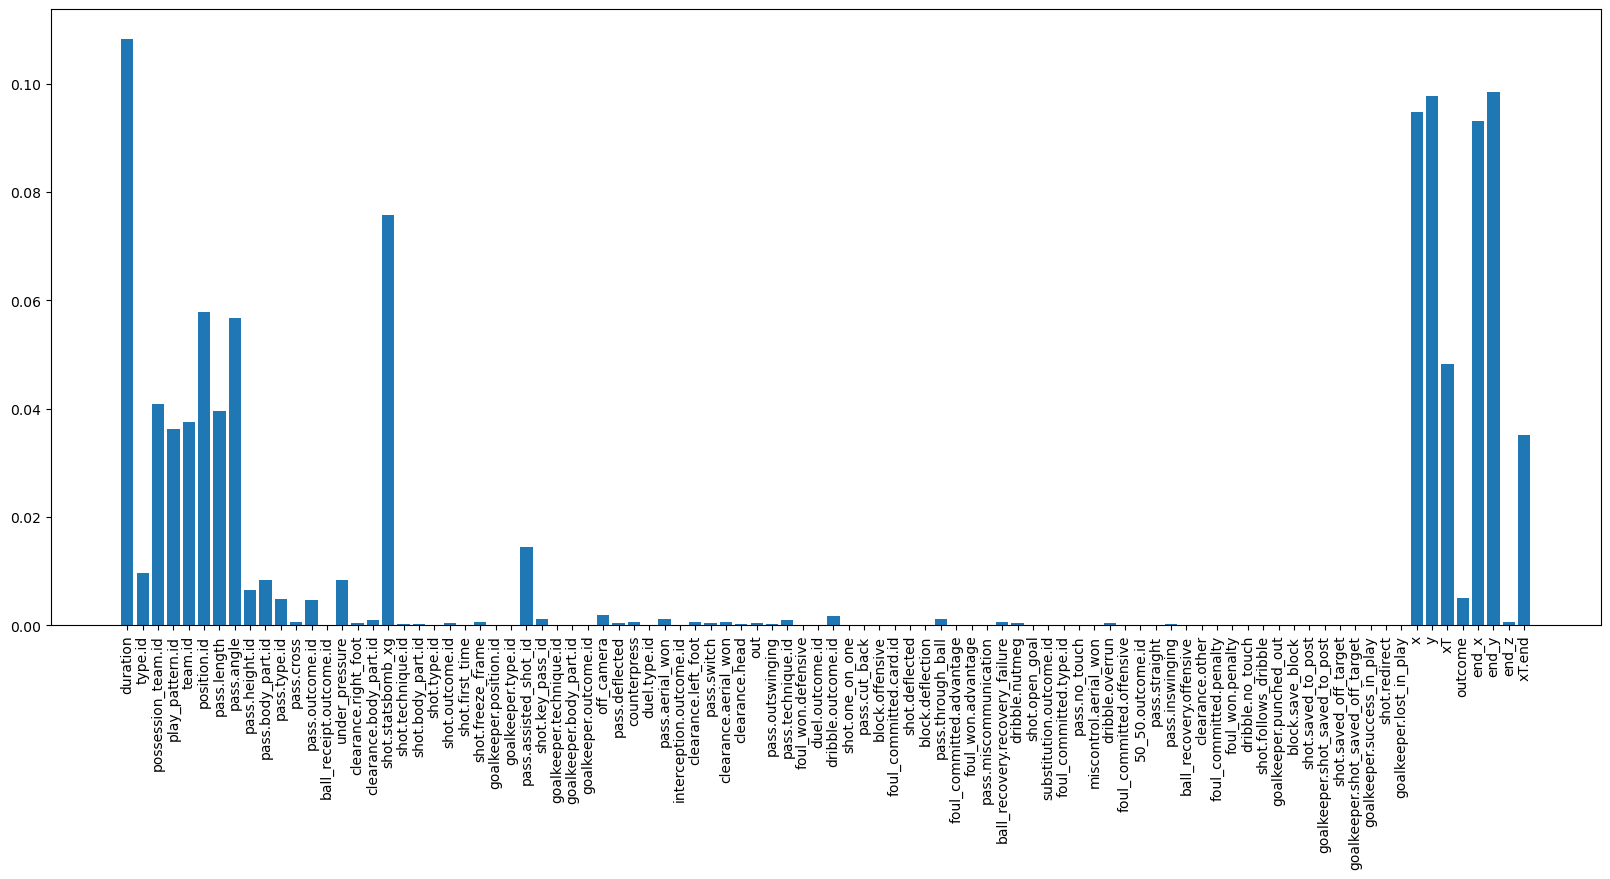

In [526]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, rf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [559]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict the PSV
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.0038387711077308424
R2 Score: 0.16298867089905933


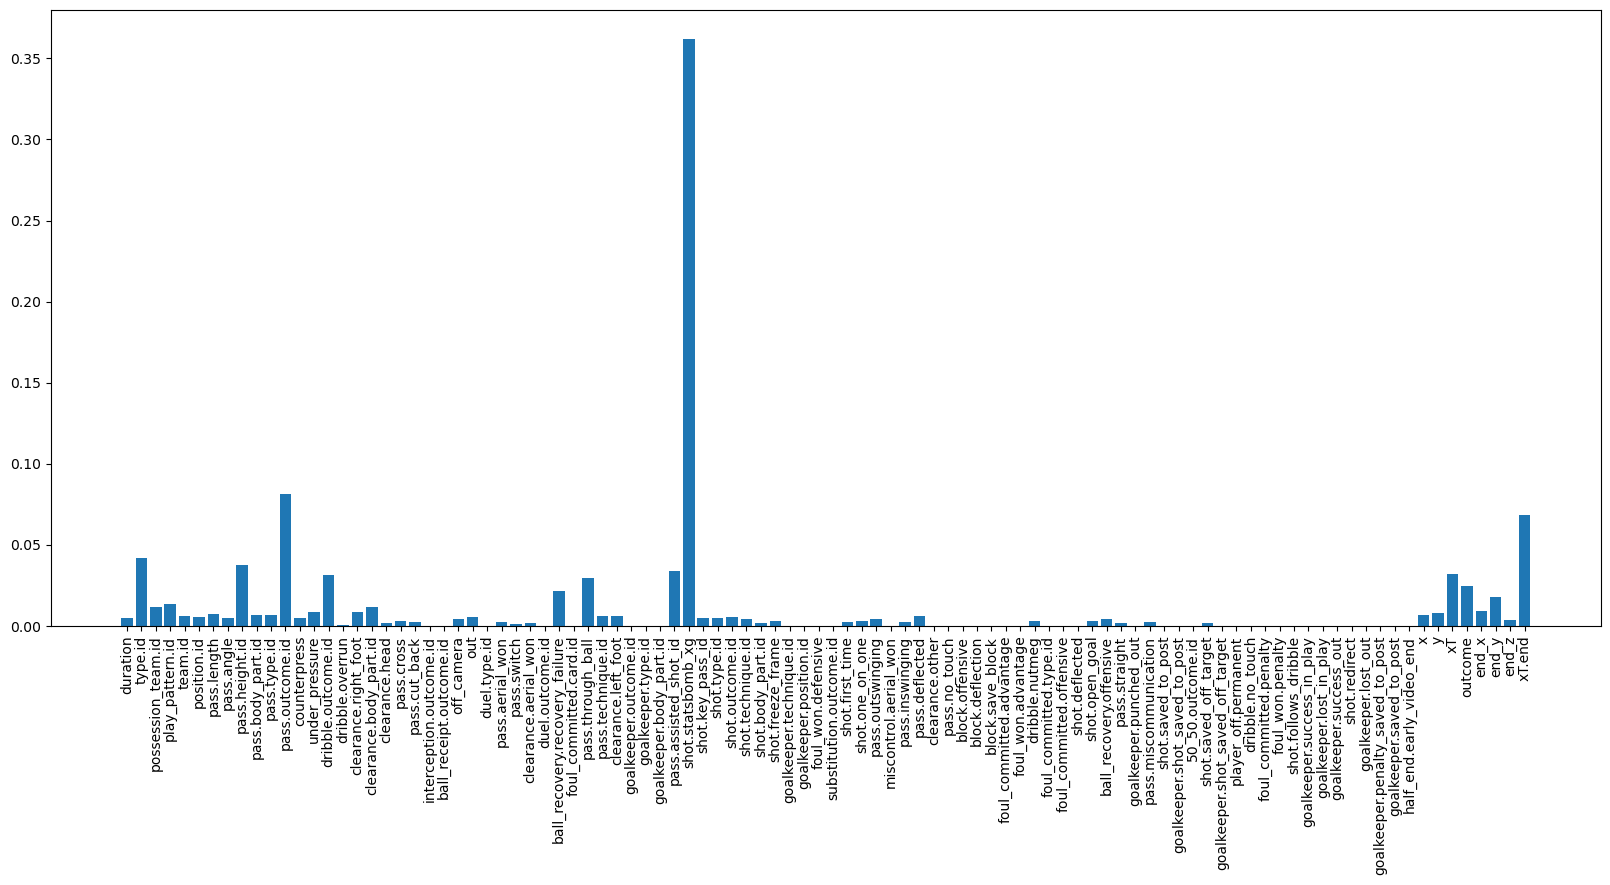

In [560]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [529]:
# matrice de corrélation sans valeurs juste couleurs a grande echelle pour bien tout voir 
plt.figure(figsize=(20, 8))
corr = df.corr()
plt.matshow(corr, cmap='coolwarm', fignum=1)
plt.colorbar()

ValueError: could not convert string to float: 'FIFA World Cup_2022'

<Figure size 2000x800 with 0 Axes>

In [530]:
df["type.name"].value_counts()  

type.name
Pass             68515
Carry            53764
Ball Recovery     5821
Clearance         2684
Dribble           1793
Shot              1453
Dispossessed      1431
Name: count, dtype: int64

In [561]:
r2_score(y_test, y_pred)

0.16298867089905933

In [562]:
X_test["pred"] = y_pred

In [563]:
X_test["true"] = y_test

In [564]:
X_test[["type.id", "xT", "xT.end", "shot.statsbomb_xg", "pred", "true"]].head(110)

,type.id,xT,xT.end,shot.statsbomb_xg,pred,true
882093,43,0.042,0.068,0.000000,0.022996,0.074439
400488,43,0.006,0.006,0.000000,0.012850,0.000000
1690489,43,0.004,0.004,0.000000,0.012367,0.000000
325005,30,0.004,0.004,0.000000,0.008768,0.069583
591485,30,0.004,0.005,0.000000,0.019431,0.000000
729701,43,0.003,0.003,0.000000,-0.002593,0.000000
1076935,43,0.017,0.025,0.000000,0.019441,0.139977
1828057,30,0.012,0.034,0.000000,0.032153,0.000000
1055857,16,0.068,0.171,0.033629,0.043706,0.033629
1321424,43,0.013,0.012,0.000000,0.022108,0.000000


In [565]:
passes = df[df["type.name"] != "Shot"]

column_name = passes.columns[passes.columns.str.endswith("name")]
end_location = passes.columns[passes.columns.str.endswith("end_location")]
to_drop = [*column_name, *end_location] + ["id", "index", "match_id", "match_date", "period", "player.id", "player.name",
                                           "substitution.replacement.id", "substitution.replacement.name",
                                           "match_outcome", "minute", "second", "possession", "possession_2",
                                           "competition_season", "timestamp", "half_start.late_video_start", "injury_stoppage.in_chain", "bad_behaviour.card.id",
                                           "tactics.lineup", "tactics.formation", "player.id", "pass.recipient.id","related_events", "location", "PSV", "shot.aerial_won",
                                           "pass.shot_assist", "pass.goal_assist", "pass.assisted_shot_id"
                                           ]


# Select the features and the target
X = passes.drop(to_drop, axis=1)
y = passes["PSV"]

In [566]:
# Transform the categorical variables into numerical variables
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = pd.Categorical(X[col]).codes

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [568]:
# Create the model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Mean Squared Error: 0.0039782093464052785
R2 Score: 0.08698971319074711


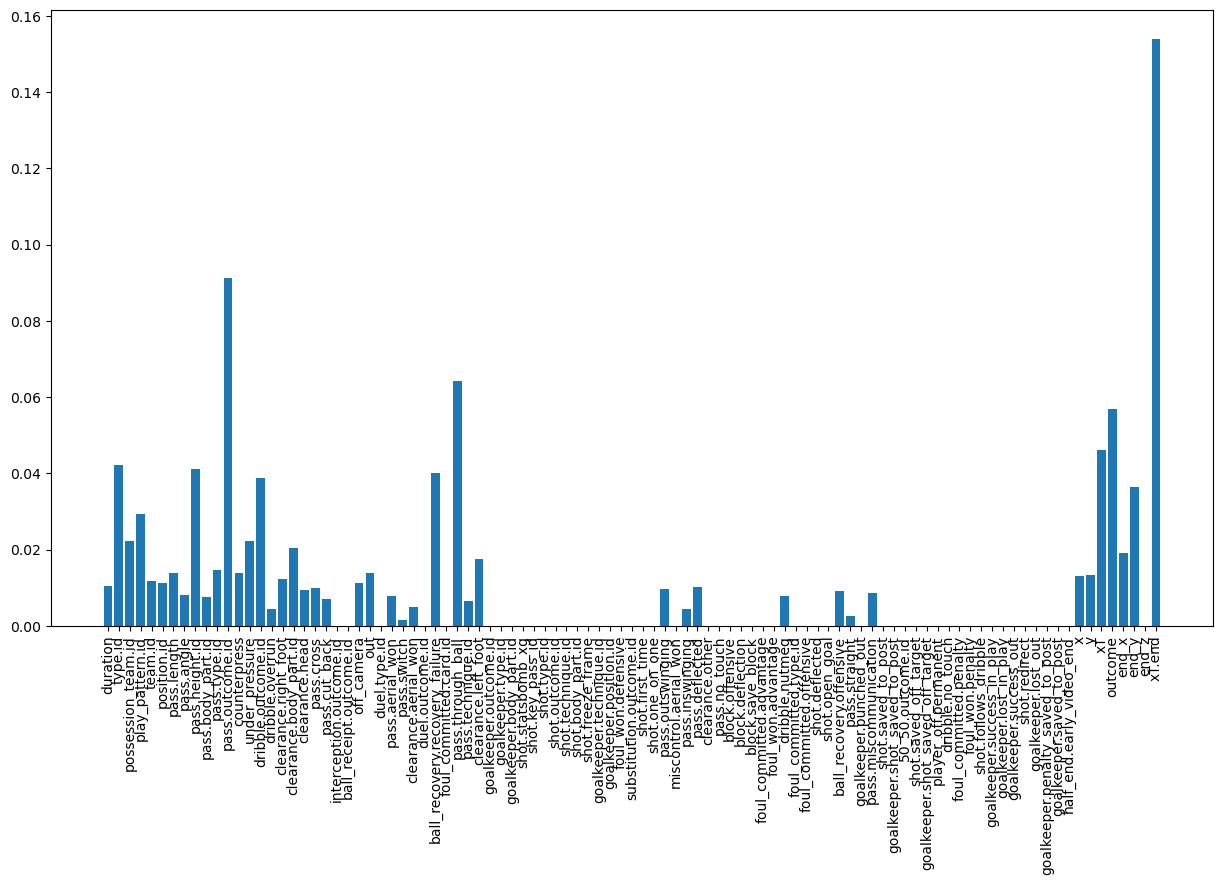

In [569]:

# Predict the PSV
y_pred = xgb.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(15, 8))
plt.bar(X_train.columns, xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()


## Cross Validation

In [570]:
y_cv = cross_val_predict(xgb, X_train, y_train, cv=5)

In [26]:
mean_squared_error(y_train, y_cv)

0.002158090504044677

In [27]:
r2_score(y_train, y_cv)

0.18526316222212225